In [5]:
import os, fnmatch, sys
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
import random

In [6]:
random.seed(42)

In [7]:
#dir_path = '/Users/adel.schmucklermann/Desktop/test/data'
#dir_path = './bmrb/bmrb_entries'

filtered_data = '/Users/adel.schmucklermann/Desktop/master_thesis/data/bmrb_fasta_monomer_pH68.txt'
#filtered_data = './bmrb_fasta_filtered.txt'

output_hn = "/Users/adel.schmucklermann/Desktop/master_thesis/data/bmrb_hn_monomer_pH68.txt"
#output_hn = "./bmrb_hn_table.txt"

In [8]:
def get_interset_file(fasta_file, hn_ids_file, output):
    
    with open(hn_ids_file, 'r') as ids:
        id_list = ids.read().split("\n")
        id_list.remove('BRMB_ID')
        id_list.remove('')
    ids.close()
    print("Available H_N_entries: "+str(len(id_list)))


   
    #file = open(output, 'w')
    #file.write("BRMB_ID"+"\t"+"Sequence"+"\t"+"Sequence_ID"+"\t"+"Ion"+"\t"+"pH"+"\t"+"Temperature"+"\t"+"Experiment"+"\n")

    """with open(fasta_file, 'r') as fasta_f:
        data = fasta_f.read().split("\n")
        for line in data:
            l = line.split("\t")
            ID = l[0]

            if ID != 'BRMB_ID':

                if ID in id_list:
                    file.write(line+"\n")

        file.close() 
    fasta_f.close()"""
    
    return id_list


        
markus_data = "/Users/adel.schmucklermann/Desktop/master_thesis/data/bmrb_fasta_all.txt"
id_file = "/Users/adel.schmucklermann/Desktop/master_thesis/data/bmrb_IDs_monomer_pH68.txt"
output = '/Users/adel.schmucklermann/Desktop/master_thesis/data/bmrb_fasta_monomer_pH68_f.txt'


id_list = get_interset_file(markus_data, id_file, output)

Available H_N_entries: 8472


In [9]:
def get_fasta_file(fasta_file, id_list, output):
    file = open(output, 'w')

    with open(fasta_file, 'r') as fasta_f:
        data = fasta_f.read().split("\n")
        for line in data:
            l = line.split("\t")
            ID = l[0]

            if ID != 'BRMB_ID':

                if ID in id_list:
                    file.write(">"+ID+"\n"+l[1]+"\n")

        file.close() 
    fasta_f.close()

get_fasta_file("/Users/adel.schmucklermann/Desktop/master_thesis/data/bmrb_fasta_monomer_pH68.txt",id_list, "/Users/adel.schmucklermann/Desktop//master_thesis/data/bmrb_monomer_pH68.fasta")


In [71]:
AA_list = ["ala","cys", "asp", "glu", "phe", "gly", "his", "ile", "lys", "leu", "met", "asn", "pro", "gln", "arg", 
           "ser", "thr", "val", "trp", "tyr","a","r","n","d", "c","e","q","g","h","i",
           "l","k","m","f","p","s","t","w","y","v" ] 

aa_list = ["a","r","n","d", "c","e","q","g","h","i",
           "l","k","m","f","p","s","t","w","y","v"]

aa_dict = {"a":"ALA", "r": "ARG", "n":"ASN", "d":"ASP", "c":"CYS", "e":"GLU", "q":"GLN", "g":"GLY","h":"HIS",
           "i":"ILE","l":"LEU","k":"LYS","m":"MET", "f":"PHE","p":"PRO", "s":"SER","t":"THR","w":"TRP",
          "y":"TYR", "v":"VAL"} 


In [72]:
def find(name, path):
    path_list = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if fnmatch.fnmatch(file, name):
                path_list.append(os.path.join(root, file))
    return path_list

path_list = find('*_3.str', dir_path)
#print(path_list)

In [73]:
def put_residue_in_dict(dictionary, residue, shift):

    if residue not in dictionary:
        dictionary[residue] = [shift]
    else:
        shift_list = dictionary[residue]
        shift_list.append(shift)
        dictionary[residue] = shift_list
    
    return dictionary

In [74]:
#BMRB Entries with both H/N-values and Experiment_type=Solution

useable_IDs = []

seq_IDs = {} #{useable_IDs: seq_IDs}

ions = []
pHs = []
temperatures = []
fasta_len = []

experiments = []

with open(filtered_data, 'r') as file:
    data = file.read().split("\n")
    
    for line in data:
        l = line.split("\t")
        
        if l[0] != 'BRMB_ID' and l[0] != '':
            
            b_id = l[0]
            
            ion = float(l[3])
            pH = float(l[4])
            temperature = float(l[5])
            experiment = l[6]
            
            experiments.append(experiment)
            
            #if pH > 8.2 or pH < 6.0:
            #    continue
            #if ion > 3. or pH > 13. or temperature < 273.15 or temperature > 373.15:
                    
        
            useable_IDs.append(b_id)
            seq_IDs[b_id] = l[2].split(",")
            
            ions.append(ion)
            pHs.append(pH)
            temperatures.append(temperature)
            
            fasta_len.append(len(l[1]))
            
    file.close()        

print("useable BMRB-Entries: "+ str(len(useable_IDs)))

useable BMRB-Entries: 8295


In [53]:
#import pandas

def get_statistic_plots():
    
    ### Experiment
    letter_counts = Counter(experiments)
    df = pandas.DataFrame.from_dict(letter_counts, orient='index')
    #df.plot(kind='bar')
    
    
    ### Ions
    ion_list = []
    for ion in ions:
        if ion > 2:
            continue
        ion_list.append(ion)

    plt.figure(figsize=(15, 5))
    plt.title("Ions")
    plt.hist(ions, bins=100)

    #plt.show()
    #plt.savefig("./ions_10854.png", bbox_inches='tight')
    
    
    
    ### pH
    ph_list = []
    for ph in pHs:
        if ph > 15:
            continue
            #ph_list.append(-0.5)
        ph_list.append(ph)

    plt.figure(figsize=(15, 5))
    plt.title("pHs")
    plt.hist(ph_list, bins=100)
    
    #plt.show()
    #plt.savefig("./pH_10854.png", bbox_inches='tight')
    
    
    
    
    ### Temperature
    temperature_list = []
    for t in temperatures:
        if t > 350 or t < 200:
            continue
        temperature_list.append(t)

    plt.figure(figsize=(15, 5))
    plt.title("Temperature")
    plt.hist(temperatures, bins=100)
    
    #plt.show()
    #plt.savefig("./temperature_10854.png", bbox_inches='tight')
    
    
    
    
    
    ### Peptide Length
    plt.figure(figsize=(15, 5))
    plt.title("Peptide Length")
    plt.hist(fasta_len, bins=100)
    
    #plt.show()
    #plt.savefig("./peptide_length_10854.png", bbox_inches='tight')
    

In [75]:
def get_hn_values(path_list, useable_IDs, output_hn):


    residue_H_dict = {} #{residue: shifts}
    residue_N_dict = {}

    can_residue_H_dict = {} #{canonical_residue: shifts}
    can_residue_N_dict = {}

    n_peaks_H_dict = {} #{residue: number of peaks}
    n_peaks_N_dict = {}


    polypeptide_L_list = []
    experiment_type = []




    out_file = open(output_hn, 'w')
    out_file.write("BRMB_ID"+"\t"+"AA_ID"+"\t"+"AA"+"\t"+"H"+"\t"+"N"+"\n")



    for path in path_list:


        f = path.split("/")[-1]

        ID = f.split("_")[0][3:]
        

        if ID in useable_IDs:
            peptide_id_list = set(seq_IDs[ID])
            peptide_id_list.add(".")
            #print(peptide_id_list)
            
            

            with open(path, 'r') as file:
                data = file.read().split("\n")

                index = 0
                index_start = 0
                polymer = False   



                for line in data:

                    match_experiment = re.findall(r'\s*_Entry.Experimental_method_subtype', line)
                    if match_experiment:
                        type_s = line.split()[1:]
                        experiment_type.append(' '.join(type_s).replace("'", ""))



                    match2 = re.match(r'\s*_Atom_chem_shift.ID$',line)
                    if match2:
                        index_start = data.index(line)
                        #break;


                    if index_start != 0: 

                        match_0 = re.match(r'\s* _Atom_chem_shift.Seq_ID$',line)
                        if match_0:
                            residue_id_index = data.index(line)
                            residue_id_i = residue_id_index - index_start

                        match_1 = re.match(r'\s*_Atom_chem_shift.Comp_ID$',line)
                        if match_1:
                            residue_index = data.index(line)
                            residue_i = residue_index - index_start

                        match_2 = re.match(r'\s*_Atom_chem_shift.Atom_ID$',line)
                        if match_2:
                            atom_index = data.index(line)
                            atom_i = atom_index - index_start

                        match_3 = re.match(r'\s*_Atom_chem_shift.Val$',line)
                        if match_3:
                            shift_index = data.index(line)
                            shift_i = shift_index - index_start
                            
                        match_4 = re.match(r'\s*_Atom_chem_shift.Auth_asym_ID$',line)
                        if match_4:
                            peptide_index = data.index(line)
                            peptide_i = peptide_index - index_start   
                        

                        match_end = re.match(r'\s*_Atom_chem_shift.Assigned_chem_shift_list_ID$',line)
                        if match_end:
                            index = data.index(line)

                            break;



                H_shifts = {}
                N_shifts = {}

                can_H_shifts = {}
                can_N_shifts = {}

                H_temp = 0  #Assumption: only one H/N value per residue_index
                N_temp = 0
                res_id_temp = "-2"
                residue_temp = "tmp"


                 
                if index != 0:
                    #Shift table was found in the text file   
                    for line in data[index+2:]:

                        l = line.split()

                        #End of the table
                        if len(l) == 1:
                            if res_id_temp != "-2":

                                if H_temp != 0 and N_temp != 0 and (peptide_temp in peptide_id_list or len(peptide_id_list)==1):

                                    out_file.write(ID+"\t"+res_id_temp+"\t"+residue_temp+"\t"+str(H_temp)+"\t"+str(N_temp)+"\n")

                                    if residue_temp.lower() not in AA_list:
                                        non_canonical_protein = True
                                    else:
                                        can_N_shifts = put_residue_in_dict(can_N_shifts, residue_temp, N_temp)
                                        can_H_shifts = put_residue_in_dict(can_H_shifts, residue_temp, H_temp) 


                                    N_shifts = put_residue_in_dict(N_shifts, residue_temp, N_temp)
                                    H_shifts = put_residue_in_dict(H_shifts, residue_temp, H_temp) 


                            break

                        else:
                            if len(l) >= 12:

                                residue_id = l[residue_id_i]
                                residue = l[residue_i]
                                atom = l[atom_i]
                                shift = float(l[shift_i])
                                peptide = l[peptide_i]
                                
                                    
                                #Initiate the variable at the beginning of the shift table
                                if  res_id_temp == "-2":
                                    res_id_temp = residue_id
                                    residue_temp = residue
                                    peptide_temp = peptide
                                
                                #check if residue is canonical
                                if residue.lower() in aa_list:
                                    residue = aa_dict[residue.lower()]  
                                 
                                
                                #check if next residue reached
                                #if yes: save the H/N value of the previous residue
                                if residue_id != res_id_temp:
                                    
                                    
                                        
                                    #check if H/N value exists and residue_peptide corresponds to right peptide
                                    # There was an error e.g. BMRB_11136 
                                    #(annotated peptide was A but in shift table the peptide was just ".")
                                    # in peptide_list "." added manually
                                    if H_temp != 0 and N_temp != 0 and (peptide_temp in peptide_id_list or len(peptide_id_list)==1):
                                        
                                        """if ID == '36133':
                                            print(peptide_id_list)
                                            print(peptide_temp)"""

                                        out_file.write(ID+"\t"+res_id_temp+"\t"+residue_temp+"\t"+str(H_temp)+"\t"+str(N_temp)+"\n")

                                        if residue_temp.lower() not in AA_list:
                                            non_canonical_protein = True
                                        else:
                                            can_N_shifts = put_residue_in_dict(can_N_shifts, residue_temp, N_temp)
                                            can_H_shifts = put_residue_in_dict(can_H_shifts, residue_temp, H_temp) 

                                        N_shifts = put_residue_in_dict(N_shifts, residue_temp, N_temp)
                                        H_shifts = put_residue_in_dict(H_shifts, residue_temp, H_temp)

                                        H_temp = 0
                                        N_temp = 0


                                    res_id_temp = residue_id
                                    residue_temp = residue
                                    peptide_temp = peptide
                                    

                                if atom == "H":
                                    H_temp = shift


                                if atom == "N":
                                    N_temp = shift
                                    
                                    
                               

            #if shift table ended: save the non-zero N/H_list of the entry
            if len(N_shifts) > 0 and len(H_shifts) > 0:

                residue_H_dict = {key:H_shifts.get(key,[])+residue_H_dict.get(key,[]) for key in set(list(H_shifts.keys())+list(residue_H_dict.keys()))}
                residue_N_dict = {key:N_shifts.get(key,[])+residue_N_dict.get(key,[]) for key in set(list(N_shifts.keys())+list(residue_N_dict.keys()))}

                can_residue_H_dict = {key:can_H_shifts.get(key,[])+can_residue_H_dict.get(key,[]) for key in set(list(can_H_shifts.keys())+list(can_residue_H_dict.keys()))}
                can_residue_N_dict = {key:can_N_shifts.get(key,[])+can_residue_N_dict.get(key,[]) for key in set(list(can_N_shifts.keys())+list(can_residue_N_dict.keys()))}


                n_peaks_H_dict = {key: len(value) for key,value in H_shifts.items()}
                n_peaks_N_dict = {key: len(value) for key,value in N_shifts.items()}

            
           


            file.close()
    out_file.close()


    #print("polypeptide_L Entries: "+str(len(polypeptide_L_list)))                
    #print(can_residue_H_dict)                            
                
get_hn_values(path_list, useable_IDs, output_hn)          

In [175]:
def sort_data_dict(can_residue_H_dict):
    # get keys from one of the dictionary
    ks = [k for k in can_residue_N_dict.keys()]

    # call values from each dictionary on available keys
    data = {k: [{"x":can_residue_H_dict[k][idx],"y" :can_residue_N_dict[k][idx]} for idx in range(len(can_residue_N_dict[k]))] for k in ks}


<Figure size 432x288 with 0 Axes>

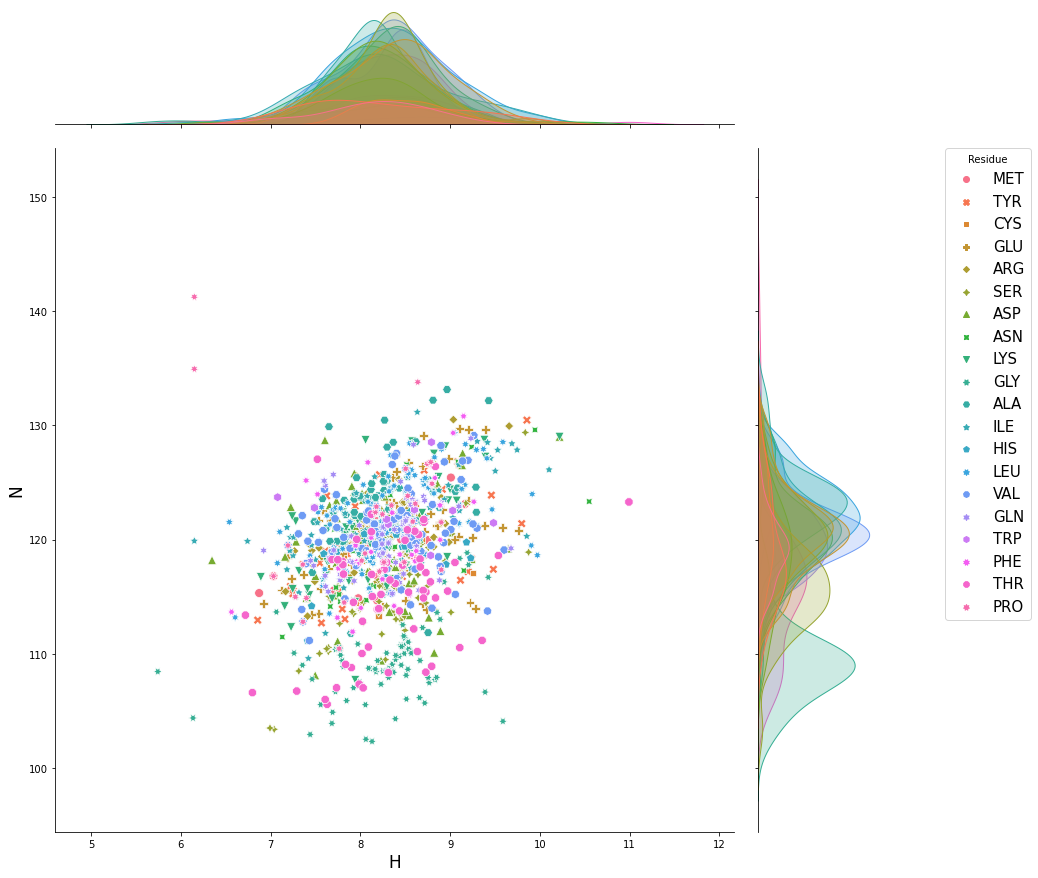

In [179]:
def plot_jointplot_old():

    x, y, group = [], [], []
    for i in data:
        for j in data[i]:
            x.append(j['x'])
            y.append(j['y'])
            group.append(i)

    plt.figure()#figsize=(40,40)
    custom_palette = sns.color_palette("husl", 20)


    sns.jointplot(x = x, y = y, hue = group,palette=custom_palette , style=group, s=80, height=12) #, xlim = (0, 15), ylim = (75, 150))

    plt.legend(title='Residue',bbox_to_anchor=(1.31, 1), loc='upper left', borderaxespad=0.,fontsize=15)
    plt.xlabel("H",fontsize=17)
    plt.ylabel("N",fontsize=17)




    #plt.ylim(75, 150)
    #plt.xlim(0, 15)

    #title = 'Simulated H-N peak positions'
    #plt.title(title,fontsize=20)


    #plt.savefig("./plots/filtered/h_n_jointplot.png", bbox_inches='tight')
    #plt.show()

In [390]:
"""df = pd.read_csv(output_hn, sep="\t")
 
df = df.drop(['BRMB_ID'], axis=1)
print(len(df))

#Drop rows where AA not canonical
df = df.drop(df[~df['AA'].str.lower().isin(AA_list)].index)
print(len(df))
"""

1191181
1189942


In [396]:
"""# Normalization
df2 = df.drop(['AA'], axis=1)

normalized_df=(df2-df2.mean())/df2.std()
normalized_df['AA'] = df['AA']

print(normalized_df)"""

H      8.263428
N    119.513776
dtype: float64
                H         N   AA
0        0.261643 -1.022240  THR
1        0.261643 -1.022240  PRO
2       -0.073662 -0.905424  ILE
3       -0.686039  0.445099  GLU
4       -0.280292 -0.209218  TYR
...           ...       ...  ...
1191176  0.147057  0.977905  ALA
1191177  0.053134  0.416391  LEU
1191178  0.071919 -0.529697  SER
1191179  0.147057 -1.520922  GLY
1191180 -0.238027  0.809993  ASN

[1189942 rows x 3 columns]


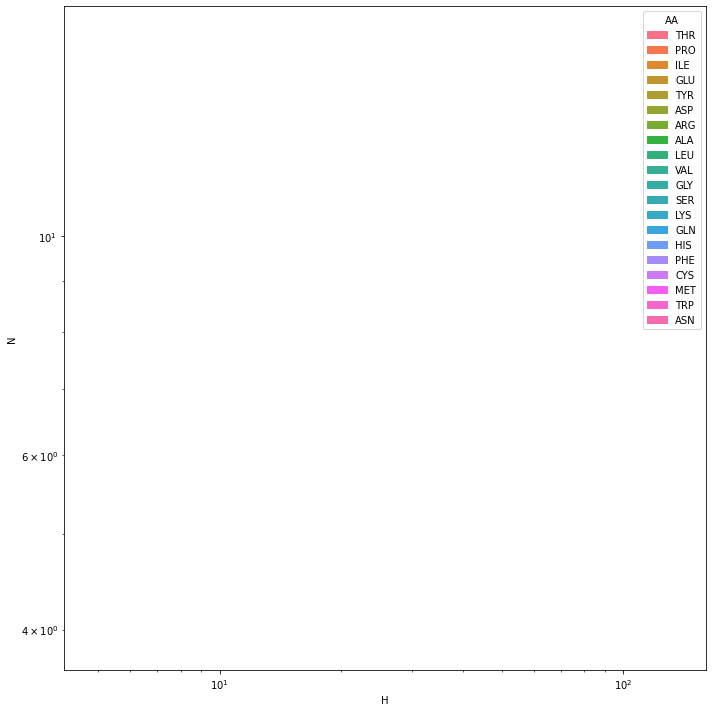

In [415]:
"""plt.figure(figsize=(10,10))

sns.kdeplot(data=normalized_df, x="H", y="N", fill=True, hue='AA')


#normalized
plt.ylim(-5, 5)
plt.xlim(-5, 5)

#not normalized
#plt.ylim(90, 150)
#plt.xlim(4, 12)
         
plt.tight_layout()

plt.show()
#plt.savefig('./contourplot_normalized_zoom.png',  bbox_inches='tight')
"""

/var/folders/vx/fv1h03_556d8rgjxwjwtnb5r0000gn/T/ipykernel_10923/2472494565.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.savefig("./jointplot_normalized_log.png", bbox_inches='tight')


<Figure size 504x252 with 0 Axes>

/Users/adel.schmucklermann/miniconda3/envs/NMR_master/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


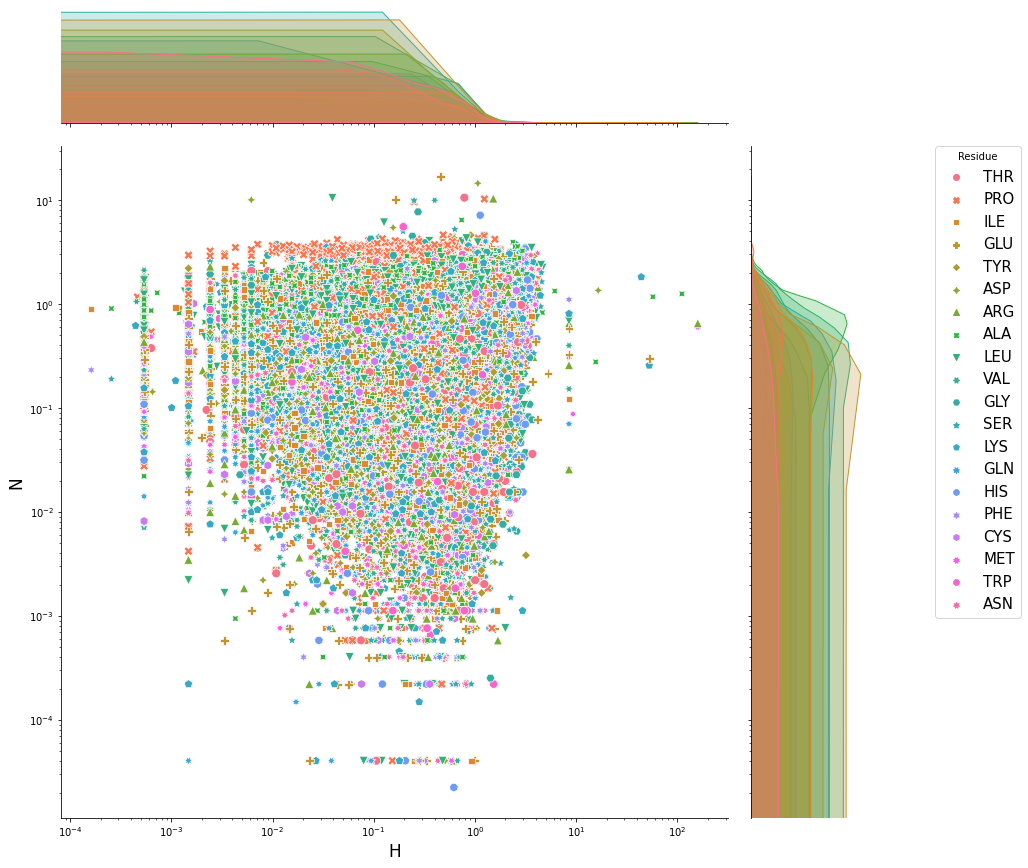

In [412]:
"""plt.figure() #figsize=(40,40)

custom_palette = sns.color_palette("husl", 20)


sns.jointplot(x=normalized_df["H"], y=normalized_df["N"], hue = normalized_df["AA"], palette=custom_palette , style=normalized_df["AA"], s=80, height=12) #, xlim = (0, 15), ylim = (75, 150))

plt.legend(title='Residue',bbox_to_anchor=(1.31, 1), loc='upper left', borderaxespad=0.,fontsize=15)
plt.xlabel("H",fontsize=17)
plt.ylabel("N",fontsize=17)


#plt.ylim(-5, 5)#(90, 150)
#plt.xlim(-5, 5)

plt.yscale('log')
plt.xscale('log')

#ax.set_xscale("log")
#ax.set_yscale("log")

#title = 'Simulated H-N peak positions'
#plt.title(title,fontsize=20)


plt.savefig("./jointplot_normalized_log.png", bbox_inches='tight')
plt.show()"""

/Users/adel.schmucklermann/miniconda3/envs/NMR_master/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
/Users/adel.schmucklermann/miniconda3/envs/NMR_master/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


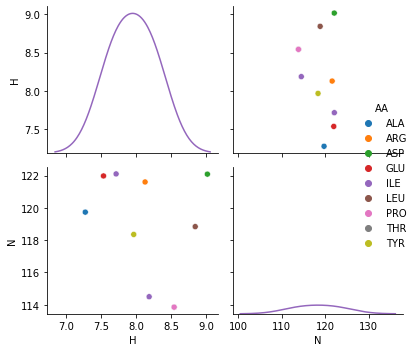

In [309]:
"""g = sns.PairGrid(df, hue="AA")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()"""